In [7]:
data_folder = r"Spine_SagittalPngs_Test"
output_folder = r"SagittalSpineSegmentationArrays"

train_image_filename = r"ultrasound"
train_segmentation_filename = r"segmentation"

test_image_filename = r"ultrasound-test"
test_segmentation_filename = r"segmentation-test"

output_image_size = 128
max_output_intensity = 1.0
test_ratio = 1.0

In [8]:
import os

from local_vars import root_folder

data_fullpath = os.path.join(root_folder, data_folder)

image_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('ultrasound.png')]
segmentation_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('segmentation.png')]

num_images = len(image_file_list)
num_segmentations = len(segmentation_file_list)

print( "Found {} image files".format(num_images))
print( "Found {} segmentations".format(num_segmentations))

Found 355 image files
Found 355 segmentations


In [9]:
import cv2
import numpy as np

from ipywidgets import IntProgress
from IPython.display import display

image_data = np.zeros([num_images, output_image_size, output_image_size, 1]).astype(np.float16)
segmentation_data = np.zeros([num_images, output_image_size, output_image_size, 1]).astype(np.uint8)

f = IntProgress(min=0, max=num_images)
print("Reading files and saving them as numpy arrays...")
display(f)

for i in range(num_images):
    f.value = i
    current_file_name = image_file_list[i]
    current_file_fullname = os.path.join(data_fullpath, current_file_name)
    current_segmentation_name = segmentation_file_list[i]
    current_segmentation_fullname = os.path.join(data_fullpath, current_segmentation_name)
    image = cv2.imread(current_file_fullname, 0)
    segmentation = cv2.imread(current_segmentation_fullname, 0)
    if image is None:
        print("File not read: {}".format(current_file_fullname))
        break
    if segmentation is None:
        print("File not read: {}".format(current_segmentation_fullname))
        break
    if image.shape[0] != output_image_size or image.shape[1] != output_image_size:
        resized_image = cv2.resize(image, (output_image_size, output_image_size)).astype(np.float16)
        image_data[i,...,0] = resized_image / resized_image.max() * max_output_intensity
        segmentation_data[i,...,0] = cv2.resize(segmentation, (output_image_size, output_image_size))
    else:
        image_data[i,...,0] = image.astype(np.float16) / image.astype(np.float16).max() * max_output_intensity
        segmentation_data[i,...,0] = segmentation[...]

print("Images converted to numpy arrays")

Reading files and saving them as numpy arrays...


IntProgress(value=0, max=355)

Images converted to numpy arrays


Showing image #177 of 355


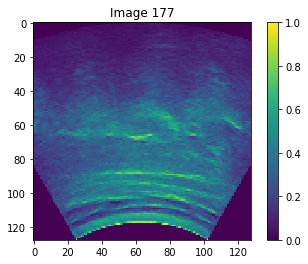

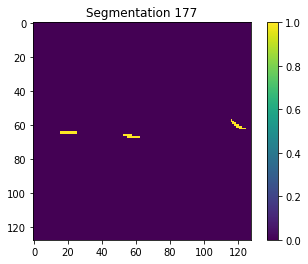

In [10]:
import matplotlib.pyplot as plt

image_index = num_images // 2
print("Showing image #{} of {}".format(image_index, num_images))

plt.imshow(image_data[image_index, :, :, 0].astype(np.float32))
plt.colorbar()
plt.title("Image " + str(image_index))
plt.show()

plt.imshow(segmentation_data[image_index, :, :, 0].astype(np.float32))
plt.colorbar()
plt.title("Segmentation " + str(image_index))
plt.show()

In [11]:
split_test = False

if test_ratio > 0.0 and test_ratio <= 1.0:
    split_test = True
    split_index = int(num_images * (1.0 - test_ratio))
    training_image_data, test_image_data = image_data[:split_index, ...], image_data[split_index:,  ...]
    training_segmentation_data, test_segmentation_data = segmentation_data[:split_index, ...], segmentation_data[split_index:, ...]
else:
    training_image_data = image_data
    training_segmentation_data = segmentation_data

In [12]:
output_fullpath = os.path.join(root_folder, output_folder)

if not os.path.exists(output_fullpath):
    os.makedirs(output_fullpath)
    print("Created folder: " + output_fullpath)

train_image_fullname = os.path.join(output_fullpath, train_image_filename)
train_segmentation_fullname = os.path.join(output_fullpath, train_segmentation_filename)

test_image_fullname = os.path.join(output_fullpath, test_image_filename)
test_segmentation_fullname = os.path.join(output_fullpath, test_segmentation_filename)

if test_ratio < 1.0:
    print("Saving training images to:         {}".format(train_image_fullname))
    print("Saving training segmentations to:  {}".format(train_segmentation_fullname))
    np.save(train_image_fullname, training_image_data)
    np.save(train_segmentation_fullname, training_segmentation_data)
else:
    print("No training data was saved.")

if split_test == True:
    print("Saving test images to:        {}".format(test_image_fullname))
    print("Saving test segmentations to: {}".format(test_segmentation_fullname))
    np.save(test_image_fullname, test_image_data)
    np.save(test_segmentation_fullname, test_segmentation_data)
else:
    print("Test data was not split.")

No training data was saved.
Saving test images to:        j:\Data\SagittalSpineSegmentationArrays\ultrasound-test
Saving test segmentations to: j:\Data\SagittalSpineSegmentationArrays\segmentation-test
